# CSE546 - HW1 Li Zeng

In [11]:
import numpy as np
from scipy.sparse import csc_matrix
import scipy.io as io

Part-1 Building Synthetic Data

In [12]:
#set parameter
N = 50
d = 75
k = 5
sigma = 10

In [13]:
X = csc_matrix(np.random.randn(N, d))

In [14]:
w_star_0 = 0
w_star = np.zeros(d)

In [15]:
y = np.zeros(N)

In [16]:
#generate sign pattern for the first k elements in w*
#from random import randint
sign_seed = np.random.randn(k)
w_star_0 = 0
for i in range(k):
    w_star[i] = np.sign(sign_seed[i])*10

In [17]:
e = sigma*np.random.randn(N)

In [18]:
for i in range(N):
    y[i] = w_star[0] + e[i]
    for j in range(k):
        y[i] += w_star[j]*X[i,j]

Part-2 Implementing Coordinate Descent

In [19]:
#Calculate initial lambda
y_mean = np.mean(y)
lambd_max = 2*np.absolute(X.transpose().dot(y-y_mean)).max()
print lambd_max

1153.98807459


In [10]:
experi_times = 15
lambd_ar = np.zeros(experi_times)
precision_ar = np.zeros(experi_times)
recall_ar = np.zeros(experi_times)
lambd_ar[0] = lambd_max
for m in range(0,experi_times):
    print "Experiment times:", m+1
    #Initialization block
    if m != 0:
        lambd_ar[m] = lambd_ar[m-1]*0.9
    print "lambda = ", lambd_ar[m]
    lambd = lambd_ar[m]
    w_0 = np.random.randn()
    w = np.random.randn(d)
    #Set stop conditions
    alpha = 1
    first = True
    flag = False
    w_max_change = 0
    #Runtime
    #runtime = 1
    
    #main_function block
    while first or flag:
        first = False
        flag = False
        #print "Runtime: ", runtime
        #print "w_max_change: ", w_max_change
        w_max_change = 0
        y_hat = X.dot(w) + w_0
        #update w_0
        #initialize
        t0 = 0
        w_0_new = 0
        for i in range(N):
            t0 += y[i] - y_hat[i]
            w_0_new += t0 + w_0
        w_0 = w_0_new/float(N)
        #update y_hat
        y_hat_new = y_hat + t0/float(N)
        y_hat = y_hat_new

        for j in range(d):
            t1 = 0
            t2 = 0
            for i in range(N): 
                t1 += (y[i] - y_hat[i] + w[j]*X[i,j])*X[i,j]
                t2 += X[i,j]*X[i,j]
                #w_j_old = w[j]*X[i,j]
            c_j = 2*t1
            a_j = float(2*t2)
            if c_j + lambd < 0:
                w_j_new = (c_j+lambd)/a_j
            elif c_j - lambd > 0:
                w_j_new = (c_j-lambd)/a_j
            else:
                w_j_new = 0
            for i in range(N):
                y_i_new = y_hat[i] - X[i,j]*w[j] + X[i,j]*w_j_new
                y_hat[i] = y_i_new
            w_change = np.absolute(w_j_new - w[j])
            if w_change > alpha:
                flag = True
            if w_change > w_max_change:
                w_max_change = w_change
            w[j] = w_j_new
        #runtime += 1
        #print w
    #performance analysis block
    total_nonzeros = 0
    correct_nonzeros = 0
    for i in range(d):
        if w[i] != 0:            
            if w_star[i] != 0:
                correct_nonzeros += 1
            total_nonzeros += 1
    precision_ar[m] = correct_nonzeros / float(total_nonzeros)
    recall_ar[m] = correct_nonzeros / float(k)
    print "correct_nonzeros: ",correct_nonzeros
    print "total_nonzeros: ", total_nonzeros
    print "precision = ", precision_ar[m]
    print "recall = ", recall_ar[m]

Experiment times: 1
lambda =  1385.57566642


ZeroDivisionError: float division by zero

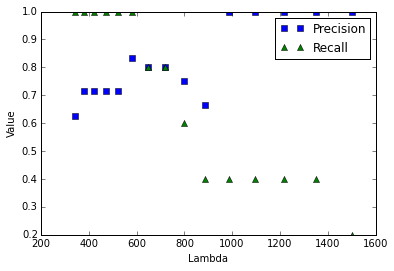

In [103]:
%matplotlib inline  
import matplotlib.pyplot as plt  
from pylab import *

x = lambd_ar

plt.plot(x, precision_ar, 'bs',  x, recall_ar, 'g^')
plt.legend(['Precision','Recall'])
plt.xlabel('Lambda')
plt.ylabel('Value')

In [99]:
#Initialize w_0 and w
w_0 = np.random.randn()
w = np.random.randn(d)
#Set stop conditions
alpha = 1
first = True
flag = False
w_max_change = 0
lambd = 470
#Runtime
runtime = 1
print lambd
    
#main_function block
while first or flag:
    first = False
    flag = False
    #print "Runtime: ", runtime
    #print "w_max_change: ", w_max_change
    w_max_change = 0
    y_hat = X.dot(w) + w_0
    #update w_0
    #initialize
    t0 = 0
    w_0_new = 0
    for i in range(N):
        t0 += y[i] - y_hat[i]
        w_0_new += t0 + w_0
    w_0 = w_0_new/float(N)
    #update y_hat
    y_hat_new = y_hat + t0/float(N)
    y_hat = y_hat_new

    for j in range(d):
        t1 = 0
        t2 = 0
        for i in range(N): 
            t1 += (y[i] - y_hat[i] + w[j]*X[i,j])*X[i,j]
            t2 += X[i,j]*X[i,j]
            #w_j_old = w[j]*X[i,j]
        c_j = 2*t1
        a_j = float(2*t2)
        if c_j + lambd < 0:
            w_j_new = (c_j+lambd)/a_j
        elif c_j - lambd > 0:
            w_j_new = (c_j-lambd)/a_j
        else:
            w_j_new = 0
        for i in range(N):
            y_i_new = y_hat[i] - X[i,j]*w[j] + X[i,j]*w_j_new
            y_hat[i] = y_i_new
        w_change = np.absolute(w_j_new - w[j])
        if w_change > alpha:
            flag = True
        if w_change > w_max_change:
            w_max_change = w_change
        w[j] = w_j_new

total_nonzeros = 0
correct_nonzeros = 0
for i in range(d):
    if w[i] != 0:            
        if w_star[i] != 0:
            correct_nonzeros += 1
        total_nonzeros += 1
precision = correct_nonzeros / float(total_nonzeros)
recall = correct_nonzeros / float(k)

print "precision = ", precision
print "recall = ", recall

470
precision =  0.714285714286
recall =  1.0
